In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

# 백신 접종 데이터 불러오기 및 전처리

In [2]:
vaccine_path = '/content/drive/MyDrive/DATATHON01/covid_vaccine.csv'
vaccine_data = pd.read_csv(vaccine_path, encoding='CP949')
vaccine_data

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%),추가접종대상자
0,2021-04-21,1019322,22501,291857,28.6,2358,13543,1.3,NaN,NaN,NaN,NaN
1,2021-04-22,1023538,27074,317386,31.0,2479,15901,1.6,NaN,NaN,NaN,NaN
2,2021-04-23,1027740,10195,345764,33.6,119,18376,1.8,NaN,NaN,NaN,NaN
3,2021-04-24,1023346,200,350427,34.2,0,18513,1.8,NaN,NaN,NaN,NaN
4,2021-04-25,1023346,23323,350631,34.2,3411,18513,1.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
315,2022-03-02,9401888,377,8304717,88.3,758,8216720,87.4,11710.0,5689522.0,60.5,9401888.0
316,2022-03-03,9401888,316,8305075,88.3,621,8217373,87.4,12679.0,5702479.0,60.7,9401888.0
317,2022-03-04,9401888,508,8305659,88.3,1057,8218519,87.4,18116.0,5720977.0,60.8,9401888.0
318,2022-03-05,9401888,345,8305965,88.3,802,8219305,87.4,9067.0,5730542.0,61.0,9401888.0


In [3]:
vaccine_data = vaccine_data.sort_values(['접종일'])
vaccine_data

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%),추가접종대상자
0,2021-04-21,1019322,22501,291857,28.6,2358,13543,1.3,NaN,NaN,NaN,NaN
1,2021-04-22,1023538,27074,317386,31.0,2479,15901,1.6,NaN,NaN,NaN,NaN
2,2021-04-23,1027740,10195,345764,33.6,119,18376,1.8,NaN,NaN,NaN,NaN
3,2021-04-24,1023346,200,350427,34.2,0,18513,1.8,NaN,NaN,NaN,NaN
4,2021-04-25,1023346,23323,350631,34.2,3411,18513,1.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
315,2022-03-02,9401888,377,8304717,88.3,758,8216720,87.4,11710.0,5689522.0,60.5,9401888.0
316,2022-03-03,9401888,316,8305075,88.3,621,8217373,87.4,12679.0,5702479.0,60.7,9401888.0
317,2022-03-04,9401888,508,8305659,88.3,1057,8218519,87.4,18116.0,5720977.0,60.8,9401888.0
318,2022-03-05,9401888,345,8305965,88.3,802,8219305,87.4,9067.0,5730542.0,61.0,9401888.0


In [4]:
# 중복데이터 제거
vaccine_data.drop_duplicates(inplace=True)

In [5]:
# 1차 접종자 데이터
vaccine_1st = vaccine_data[['접종일', '당일 1차접종자 수', '1차접종 누계', '1차접종률(%)']]
vaccine_1st

,접종일,당일 1차접종자 수,1차접종 누계,1차접종률(%)
0,2021-04-21,22501,291857,28.6
1,2021-04-22,27074,317386,31.0
2,2021-04-23,10195,345764,33.6
3,2021-04-24,200,350427,34.2
4,2021-04-25,23323,350631,34.2
...,...,...,...,...
315,2022-03-02,377,8304717,88.3
316,2022-03-03,316,8305075,88.3
317,2022-03-04,508,8305659,88.3
318,2022-03-05,345,8305965,88.3


In [6]:
# 2차 접종자 데이터
vaccine_2nd = vaccine_data[['접종일', '당일 2차접종자 수', '2차접종 누계', '2차접종률(%)']]
vaccine_2nd

,접종일,당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021-04-21,2358,13543,1.3
1,2021-04-22,2479,15901,1.6
2,2021-04-23,119,18376,1.8
3,2021-04-24,0,18513,1.8
4,2021-04-25,3411,18513,1.8
...,...,...,...,...
315,2022-03-02,758,8216720,87.4
316,2022-03-03,621,8217373,87.4
317,2022-03-04,1057,8218519,87.4
318,2022-03-05,802,8219305,87.4


In [7]:
# 1차 접종 데이터 컬럼명 변경
vaccine_1st.rename(columns = {'접종일' : 'date'}, inplace=True)
vaccine_1st

,date,당일 1차접종자 수,1차접종 누계,1차접종률(%)
0,2021-04-21,22501,291857,28.6
1,2021-04-22,27074,317386,31.0
2,2021-04-23,10195,345764,33.6
3,2021-04-24,200,350427,34.2
4,2021-04-25,23323,350631,34.2
...,...,...,...,...
315,2022-03-02,377,8304717,88.3
316,2022-03-03,316,8305075,88.3
317,2022-03-04,508,8305659,88.3
318,2022-03-05,345,8305965,88.3


In [8]:
# 2차 접종 데이터 컬럼명 변경
vaccine_2nd.rename(columns = {'접종일' : 'date'}, inplace=True)
vaccine_2nd

,date,당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021-04-21,2358,13543,1.3
1,2021-04-22,2479,15901,1.6
2,2021-04-23,119,18376,1.8
3,2021-04-24,0,18513,1.8
4,2021-04-25,3411,18513,1.8
...,...,...,...,...
315,2022-03-02,758,8216720,87.4
316,2022-03-03,621,8217373,87.4
317,2022-03-04,1057,8218519,87.4
318,2022-03-05,802,8219305,87.4


In [9]:
# 결측치 확인하기
vaccine_1st.isnull().sum()

date          0
당일 1차접종자 수    0
1차접종 누계       0
1차접종률(%)      0
dtype: int64

In [10]:
vaccine_2nd.isnull().sum()

date          0
당일 2차접종자 수    0
2차접종 누계       0
2차접종률(%)      0
dtype: int64

# 전국 코로나 확진자 데이터 불러오기 및 전처리

In [11]:
covid_path = '/content/drive/MyDrive/DATATHON01/confirmed_case.csv'
covid_data = pd.read_csv(covid_path, encoding='CP949')
covid_data

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자
0,2020-02-05,8,0,8,0,0,0,0.0,16.0,148.0,...,0,0,200.0,174.0,522.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-06,11,0,11,0,0,0,192.0,28.0,164.0,...,1,0,591.0,169.0,693.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-07,10,0,10,0,0,0,322.0,115.0,207.0,...,2,0,1106.0,264.0,842.0,0.0,0.0,0.0,0.0,NaN
3,2020-02-08,10,0,10,0,0,0,414.0,92.0,322.0,...,2,0,1677.0,620.0,1057.0,0.0,0.0,0.0,0.0,NaN
4,2020-02-09,10,0,10,0,0,0,459.0,45.0,414.0,...,3,0,2571.0,888.0,1683.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2022-03-03,894637,43675,577919,314250,10661,2468,NaN,NaN,NaN,...,1229994,8394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
758,2022-03-04,953906,59269,630185,321219,6969,2502,NaN,NaN,NaN,...,1271414,8580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
759,2022-03-05,1007099,53193,677293,327273,6054,2533,NaN,NaN,NaN,...,1307545,8796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
760,2022-03-06,1056548,49450,726716,327273,0,2559,NaN,NaN,NaN,...,1307545,8957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [12]:
# 전국 데이터만 추출
covid_data = covid_data[['서울시 기준일', '서울시 확진자', '서울시 추가 확진', '서울시 치료중', '서울시 퇴원', '서울시 사망']]
covid_data

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 사망
0,2020-02-05,8,0,8,0,0
1,2020-02-06,11,0,11,0,0
2,2020-02-07,10,0,10,0,0
3,2020-02-08,10,0,10,0,0
4,2020-02-09,10,0,10,0,0
...,...,...,...,...,...,...
757,2022-03-03,894637,43675,577919,314250,2468
758,2022-03-04,953906,59269,630185,321219,2502
759,2022-03-05,1007099,53193,677293,327273,2533
760,2022-03-06,1056548,49450,726716,327273,2559


In [13]:
# 컬럼명 변경
covid_data.rename(columns = {'서울시 기준일' : 'date'}, inplace=True)
covid_data

,date,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 사망
0,2020-02-05,8,0,8,0,0
1,2020-02-06,11,0,11,0,0
2,2020-02-07,10,0,10,0,0
3,2020-02-08,10,0,10,0,0
4,2020-02-09,10,0,10,0,0
...,...,...,...,...,...,...
757,2022-03-03,894637,43675,577919,314250,2468
758,2022-03-04,953906,59269,630185,321219,2502
759,2022-03-05,1007099,53193,677293,327273,2533
760,2022-03-06,1056548,49450,726716,327273,2559


In [14]:
# 중복 데이터 제거
covid_data.drop_duplicates(inplace=True)

In [15]:
# 결측치 확인하기
covid_data.isnull().sum()

date         0
서울시 확진자      0
서울시 추가 확진    0
서울시 치료중      0
서울시 퇴원       0
서울시 사망       0
dtype: int64

In [16]:
# 전국 코로나 확진자 데이터와 백신 데이터 기간 맞추기
# 21.04.21 ~ 22.03.06

covid_data = covid_data[covid_data['date']>='2021-04-21']
covid_data = covid_data[covid_data['date']<='2022-03-06']
covid_data

,date,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 사망
441,2021-04-21,35994,218,2660,32891,443
442,2021-04-22,36224,230,2719,33062,443
443,2021-04-23,36428,204,2755,33229,444
444,2021-04-24,36681,253,2737,33500,444
445,2021-04-25,36856,175,2640,33772,444
...,...,...,...,...,...,...
756,2022-03-02,850962,46933,544923,303589,2450
757,2022-03-03,894637,43675,577919,314250,2468
758,2022-03-04,953906,59269,630185,321219,2502
759,2022-03-05,1007099,53193,677293,327273,2533


# 위 데이터는 전부 서울시 기준입니다

In [17]:
# # 한글 글꼴 추가
# font_path = '/content/drive/MyDrive/DATATHON01/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=18)

# 1차 접종자와 확진자 비교

In [18]:
# 코로나 확진자 데이터 중 서울시 추가 확진 데이터만 사용한다.
compare_covid = covid_data[['date', '서울시 추가 확진']]
compare_covid

,date,서울시 추가 확진
441,2021-04-21,218
442,2021-04-22,230
443,2021-04-23,204
444,2021-04-24,253
445,2021-04-25,175
...,...,...
756,2022-03-02,46933
757,2022-03-03,43675
758,2022-03-04,59269
759,2022-03-05,53193


In [19]:
# 1차 접종자와 확진자 데이터 합치기
compare_1st = pd.merge(compare_covid, vaccine_1st, on='date')
compare_1st

,date,서울시 추가 확진,당일 1차접종자 수,1차접종 누계,1차접종률(%)
0,2021-04-21,218,22501,291857,28.6
1,2021-04-22,230,27074,317386,31.0
2,2021-04-23,204,10195,345764,33.6
3,2021-04-24,253,200,350427,34.2
4,2021-04-25,175,23323,350631,34.2
...,...,...,...,...,...
315,2022-03-02,46933,377,8304717,88.3
316,2022-03-03,43675,316,8305075,88.3
317,2022-03-04,59269,508,8305659,88.3
318,2022-03-05,53193,345,8305965,88.3


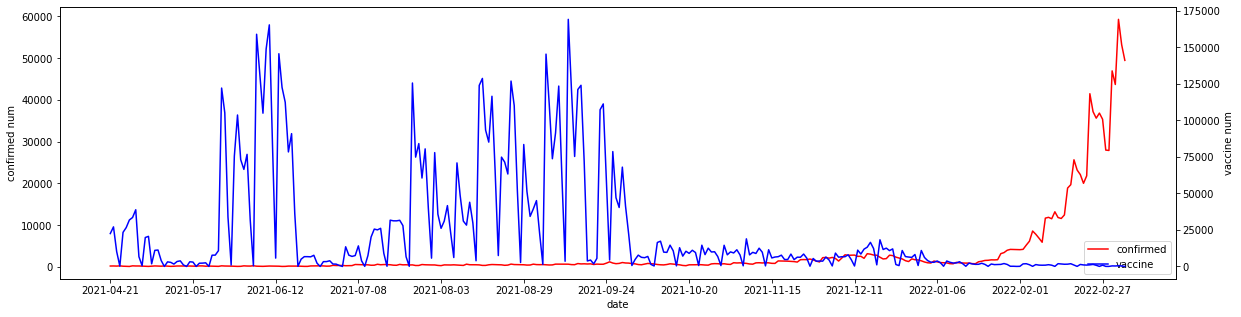

In [20]:
# 서울시 일일 확진자와 일일 접종자 비교

x = compare_1st['date']
y1 = compare_1st['서울시 추가 확진']
y2 = compare_1st['당일 1차접종자 수']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_1st['date'])/12)])

plt.show()

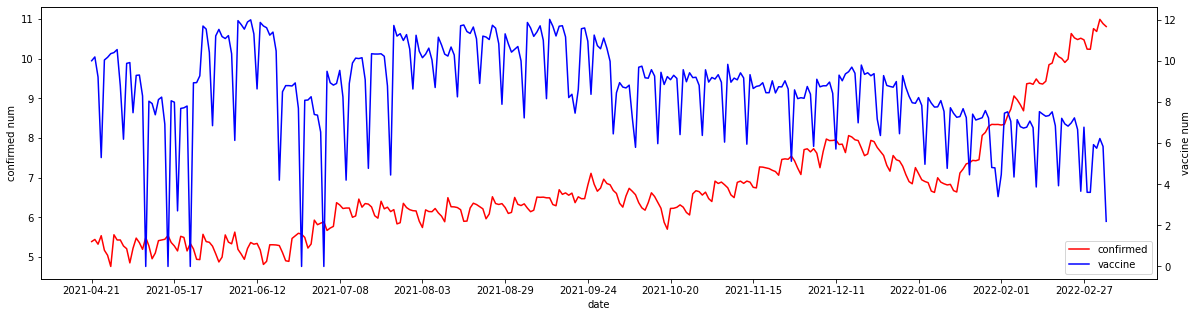

In [21]:
# 일일 확진자와 일일 접종자 로그 변환 후 비교

compare_1st['log_확진자'] = np.log1p(compare_1st['서울시 추가 확진'])
compare_1st['log_접종자'] = np.log1p(compare_1st['당일 1차접종자 수'])

x = compare_1st['date']
y1 = compare_1st['log_확진자']
y2 = compare_1st['log_접종자']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_1st['date'])/12)])

plt.show()

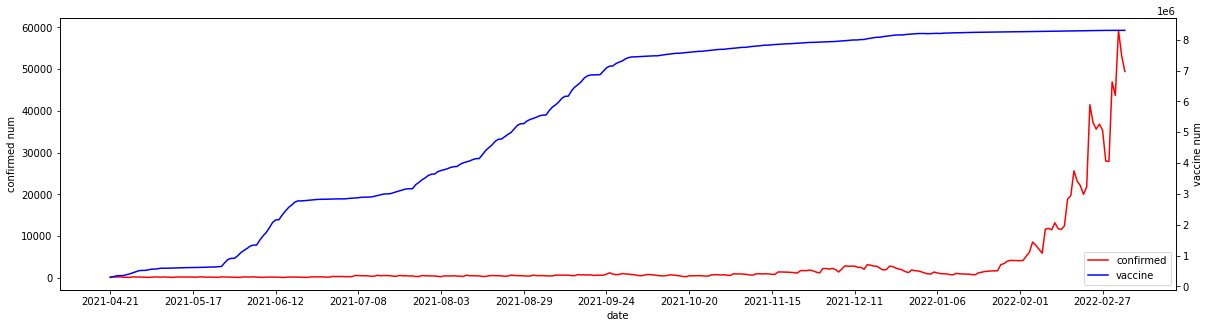

In [22]:
# 서울시 일일 확진자와 누적 접종자 비교

x = compare_1st['date']
y1 = compare_1st['서울시 추가 확진']
y2 = compare_1st['1차접종 누계']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_1st['date'])/12)])

plt.show()

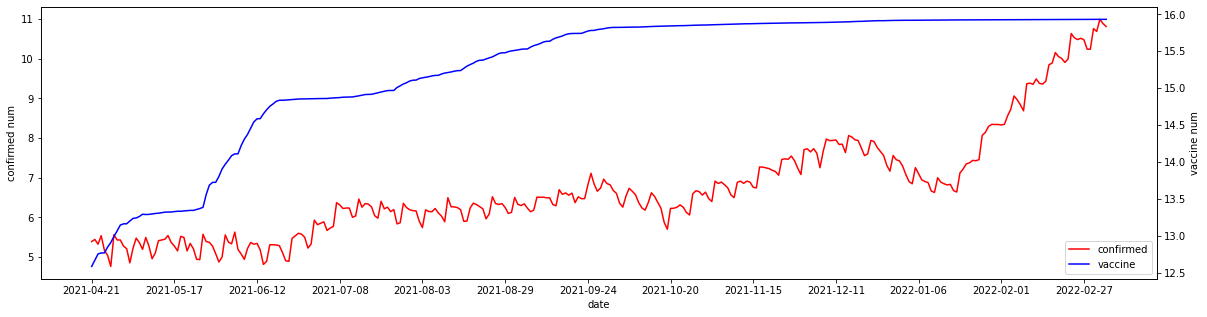

In [23]:
# 일일 확진자와 누적 접종자 로그 변환

compare_1st['log_접종자 누적'] = np.log1p(compare_1st['1차접종 누계'])

x = compare_1st['date']
y1 = compare_1st['log_확진자']
y2 = compare_1st['log_접종자 누적']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_1st['date'])/12)])

plt.show()

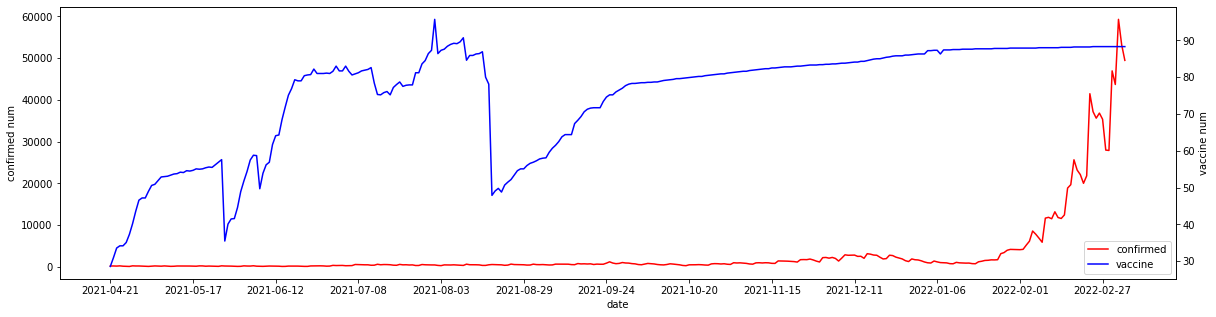

In [24]:
# 일일 확진자와 1차 접종률 비교

x = compare_1st['date']
y1 = compare_1st['서울시 추가 확진']
y2 = compare_1st['1차접종률(%)']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_1st['date'])/12)])

plt.show()

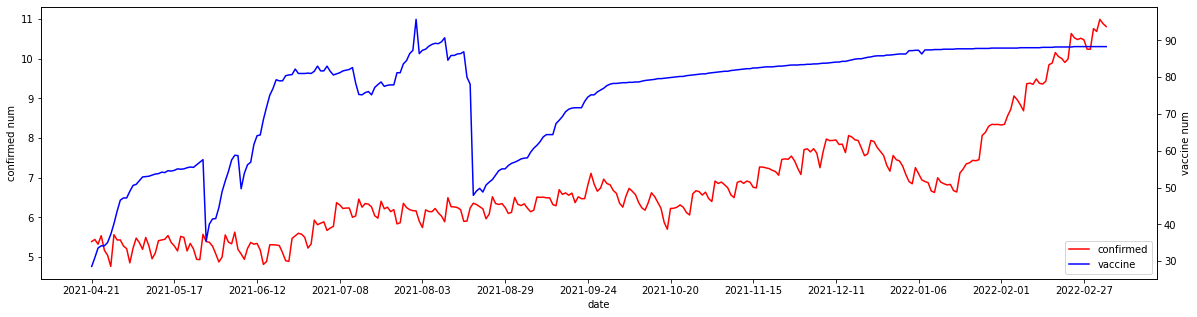

In [25]:
# 일일 확진자 로그와 1차 접종률 비교

# compare_1st['log_접종률'] = np.log1p(compare_1st['1차접종률(%)'])


x = compare_1st['date']
y1 = compare_1st['log_확진자']
y2 = compare_1st['1차접종률(%)']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_1st['date'])/12)])

plt.show()

접종률의 경우에는 데이터가 잘못되어있다   
접종률이 낮아졌다가 상승하는 거는 뭐 몸에서 백신을 뽑았다가 다시 넣은건지 염병   
데이터가 그지같다

# 2차 접종자와 확진자 비교

In [26]:
compare_covid

,date,서울시 추가 확진
441,2021-04-21,218
442,2021-04-22,230
443,2021-04-23,204
444,2021-04-24,253
445,2021-04-25,175
...,...,...
756,2022-03-02,46933
757,2022-03-03,43675
758,2022-03-04,59269
759,2022-03-05,53193


In [27]:
compare_2nd = pd.merge(compare_covid, vaccine_2nd, on='date')
compare_2nd

,date,서울시 추가 확진,당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021-04-21,218,2358,13543,1.3
1,2021-04-22,230,2479,15901,1.6
2,2021-04-23,204,119,18376,1.8
3,2021-04-24,253,0,18513,1.8
4,2021-04-25,175,3411,18513,1.8
...,...,...,...,...,...
315,2022-03-02,46933,758,8216720,87.4
316,2022-03-03,43675,621,8217373,87.4
317,2022-03-04,59269,1057,8218519,87.4
318,2022-03-05,53193,802,8219305,87.4


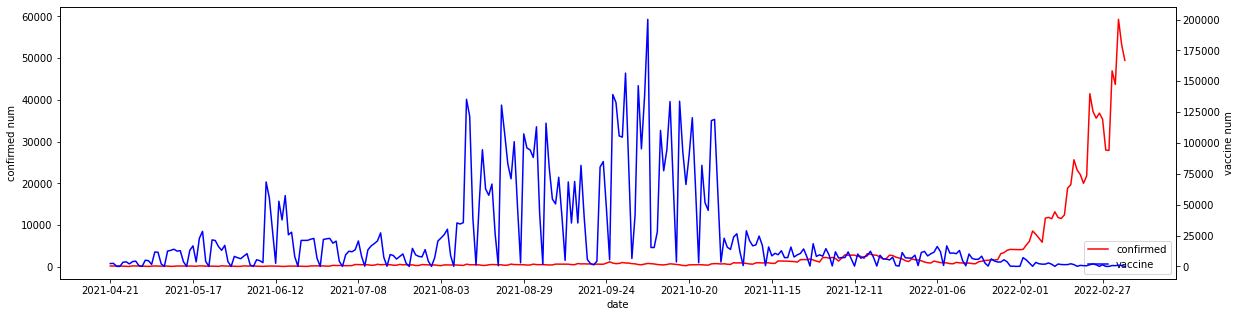

In [28]:
# 서울시 일일 확진자와 일일 접종자 비교

x = compare_2nd['date']
y1 = compare_2nd['서울시 추가 확진']
y2 = compare_2nd['당일 2차접종자 수']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_2nd['date'])/12)])

plt.show()

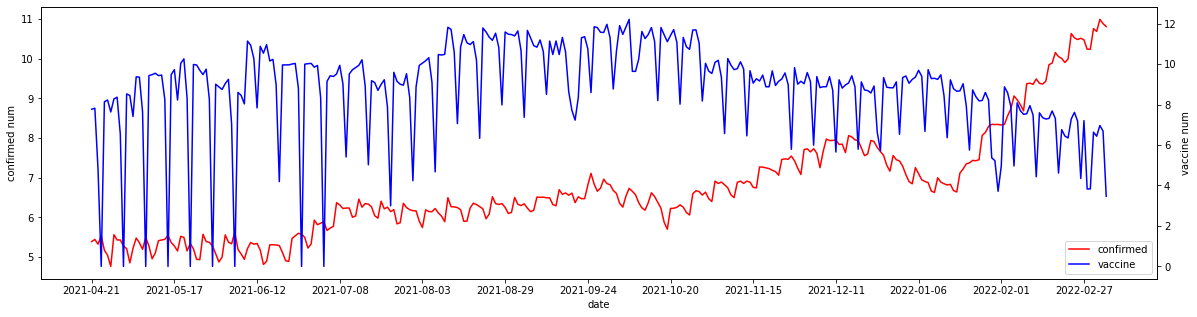

In [29]:
# 일일 확진자와 일일 접종자 로그 변환 후 비교

compare_2nd['log_확진자'] = np.log1p(compare_2nd['서울시 추가 확진'])
compare_2nd['log_접종자'] = np.log1p(compare_2nd['당일 2차접종자 수'])

x = compare_2nd['date']
y1 = compare_2nd['log_확진자']
y2 = compare_2nd['log_접종자']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_2nd['date'])/12)])

plt.show()

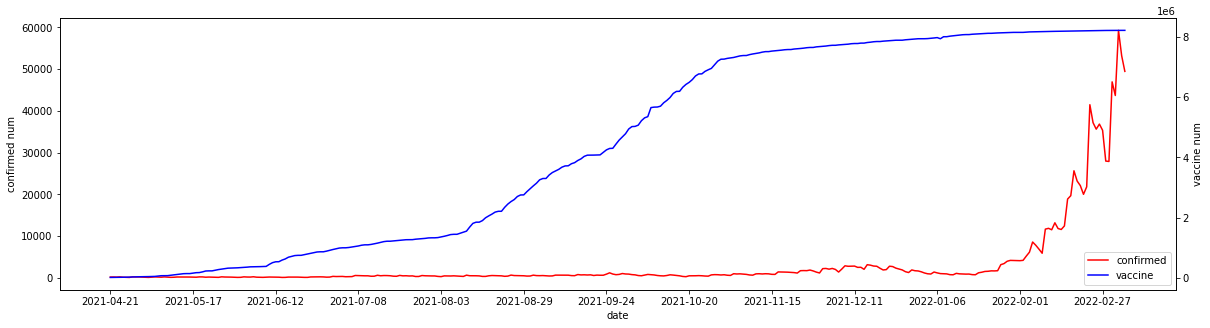

In [30]:
# 서울시 일일 확진자와 누적 접종자 비교

x = compare_2nd['date']
y1 = compare_2nd['서울시 추가 확진']
y2 = compare_2nd['2차접종 누계']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_2nd['date'])/12)])

plt.show()

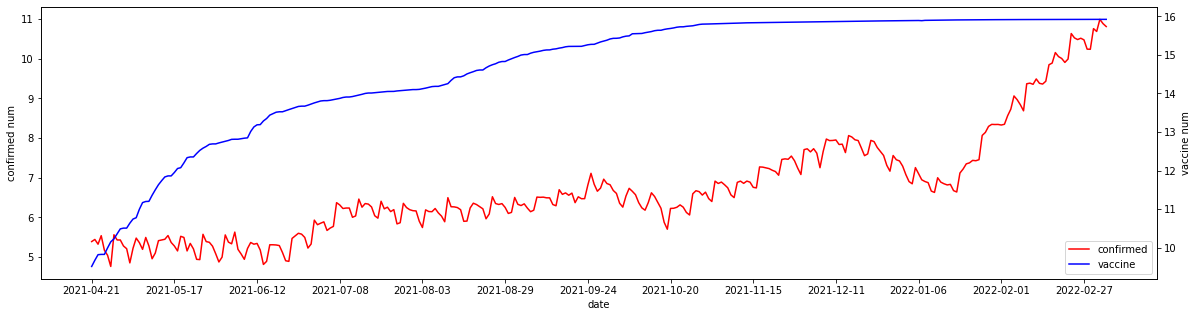

In [31]:
# 일일 확진자와 누적 접종자 로그 변환

compare_2nd['log_접종자 누적'] = np.log1p(compare_2nd['2차접종 누계'])

x = compare_2nd['date']
y1 = compare_2nd['log_확진자']
y2 = compare_2nd['log_접종자 누적']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_2nd['date'])/12)])
plt.show()

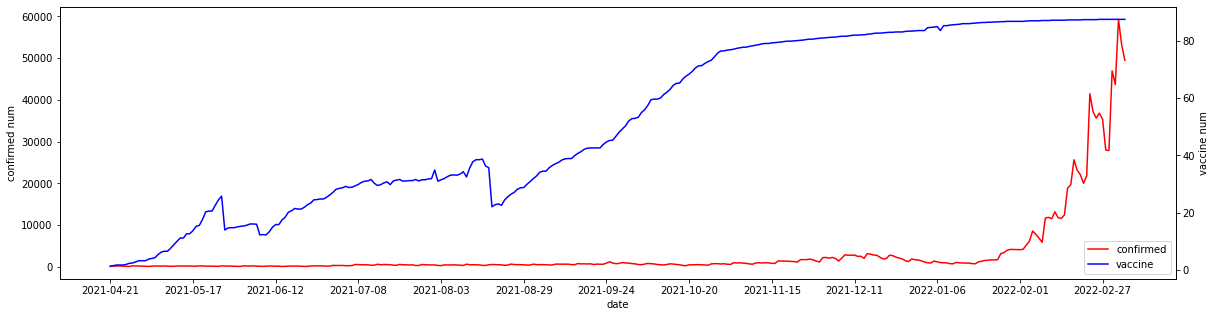

In [32]:
# 일일 확진자와 1차 접종률 비교

x = compare_2nd['date']
y1 = compare_2nd['서울시 추가 확진']
y2 = compare_2nd['2차접종률(%)']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_2nd['date'])/12)])

plt.show()

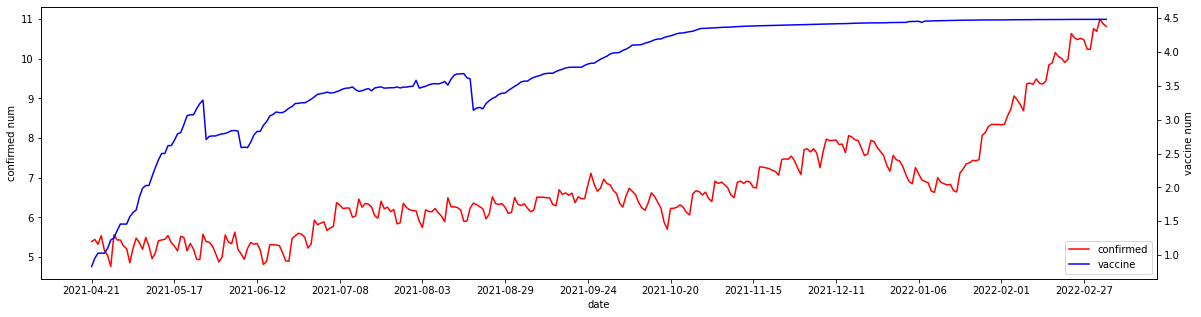

In [33]:
# 일일 확진자 로그와 1차 접종률 비교

compare_2nd['log_접종률'] = np.log1p(compare_2nd['2차접종률(%)'])


x = compare_2nd['date']
y1 = compare_2nd['log_확진자']
y2 = compare_2nd['log_접종률']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed num')
line1 = ax1.plot(x, y1, color='r', label='confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine num')
line2 = ax2.plot(x, y2, color='b', label='vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_2nd['date'])/12)])

plt.show()

# 누적 확진자와 누적 접종 비교하기

In [34]:
covid_nu = covid_data[['date', '서울시 확진자']]
covid_nu

,date,서울시 확진자
441,2021-04-21,35994
442,2021-04-22,36224
443,2021-04-23,36428
444,2021-04-24,36681
445,2021-04-25,36856
...,...,...
756,2022-03-02,850962
757,2022-03-03,894637
758,2022-03-04,953906
759,2022-03-05,1007099


In [35]:
compare_nu_1st = pd.merge(covid_nu, vaccine_1st, on='date')
compare_nu_1st

,date,서울시 확진자,당일 1차접종자 수,1차접종 누계,1차접종률(%)
0,2021-04-21,35994,22501,291857,28.6
1,2021-04-22,36224,27074,317386,31.0
2,2021-04-23,36428,10195,345764,33.6
3,2021-04-24,36681,200,350427,34.2
4,2021-04-25,36856,23323,350631,34.2
...,...,...,...,...,...
315,2022-03-02,850962,377,8304717,88.3
316,2022-03-03,894637,316,8305075,88.3
317,2022-03-04,953906,508,8305659,88.3
318,2022-03-05,1007099,345,8305965,88.3


In [36]:
compare_nu_2nd = pd.merge(covid_nu, vaccine_2nd, on='date')
compare_nu_2nd

,date,서울시 확진자,당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021-04-21,35994,2358,13543,1.3
1,2021-04-22,36224,2479,15901,1.6
2,2021-04-23,36428,119,18376,1.8
3,2021-04-24,36681,0,18513,1.8
4,2021-04-25,36856,3411,18513,1.8
...,...,...,...,...,...
315,2022-03-02,850962,758,8216720,87.4
316,2022-03-03,894637,621,8217373,87.4
317,2022-03-04,953906,1057,8218519,87.4
318,2022-03-05,1007099,802,8219305,87.4


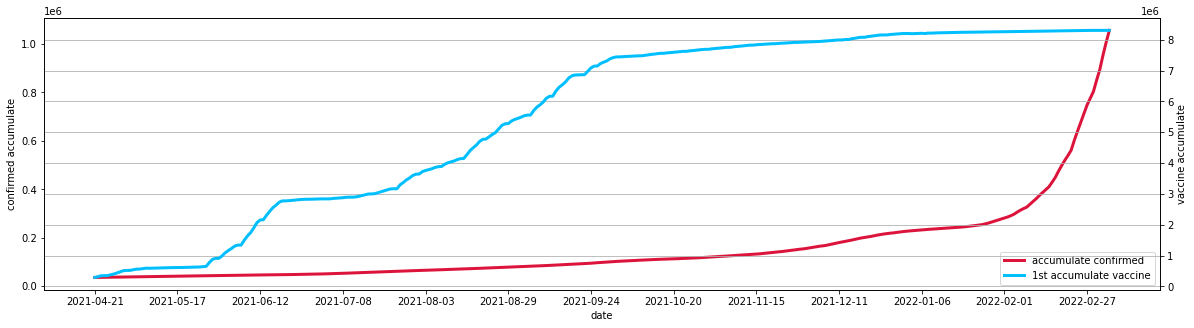

In [68]:
# 서울시 누적 확진자와 1차 누적 접종자 비교

x = compare_nu_1st['date']
y1 = compare_nu_1st['서울시 확진자']
y2 = compare_nu_1st['1차접종 누계']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed accumulate')
line1 = ax1.plot(x, y1, color='crimson', linewidth=3, label='accumulate confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('vaccine accumulate')
line2 = ax2.plot(x, y2, color='deepskyblue', linewidth=3, label='1st accumulate vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_nu_1st['date'])/12)])
plt.grid(True)
plt.show()

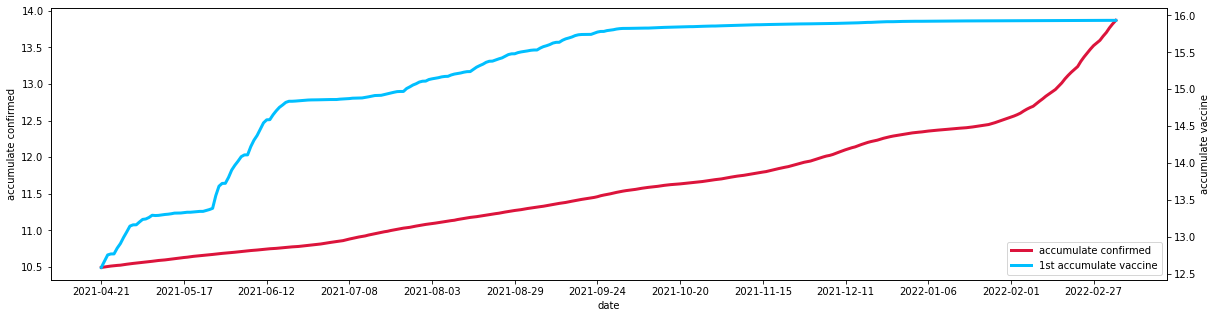

In [61]:
# 누적 확진자 로그와 1차 누적 접종자 비교

compare_nu_1st['log_누적확진'] = np.log1p(compare_nu_1st['서울시 확진자'])
compare_nu_1st['log_누적접종'] = np.log1p(compare_nu_1st['1차접종 누계'])

x = compare_nu_1st['date']
y1 = compare_nu_1st['log_누적확진']
y2 = compare_nu_1st['log_누적접종']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('accumulate confirmed')
line1 = ax1.plot(x, y1, color='crimson', linewidth=3, label='accumulate confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('accumulate vaccine')
line2 = ax2.plot(x, y2, color='deepskyblue', linewidth=3, label='1st accumulate vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_nu_1st['date'])/12)])

plt.show()

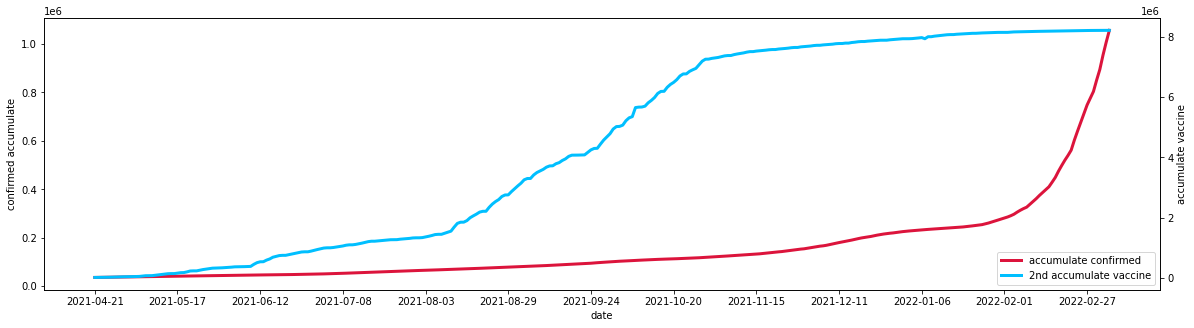

In [62]:
# 서울시 누적 확진자와 2차 누적 접종자 비교

x = compare_nu_2nd['date']
y1 = compare_nu_2nd['서울시 확진자']
y2 = compare_nu_2nd['2차접종 누계']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('confirmed accumulate')
line1 = ax1.plot(x, y1, color='crimson', linewidth=3, label='accumulate confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('accumulate vaccine')
line2 = ax2.plot(x, y2, color='deepskyblue', linewidth=3, label='2nd accumulate vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_nu_2nd['date'])/12)])

plt.show()

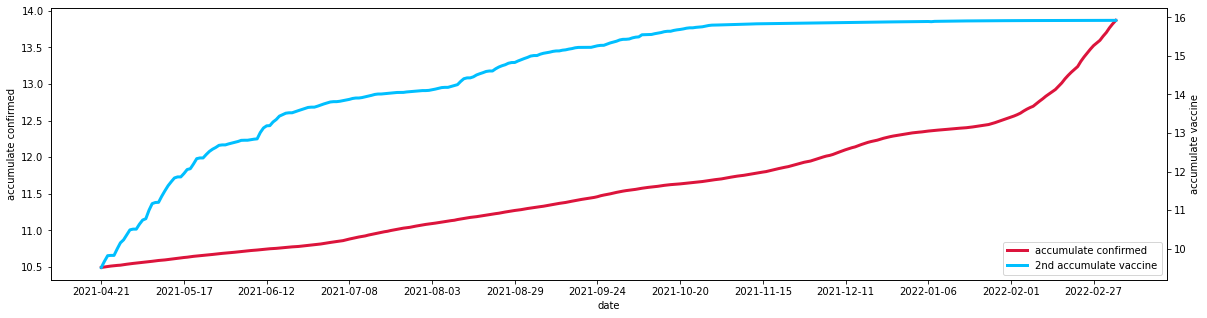

In [63]:
# 누적 확진자 로그와 1차 누적 접종자 비교

compare_nu_2nd['log_누적확진'] = np.log1p(compare_nu_2nd['서울시 확진자'])
compare_nu_2nd['log_누적접종'] = np.log1p(compare_nu_2nd['2차접종 누계'])

x = compare_nu_2nd['date']
y1 = compare_nu_2nd['log_누적확진']
y2 = compare_nu_2nd['log_누적접종']

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set_xlabel('date')
ax1.set_ylabel('accumulate confirmed')
line1 = ax1.plot(x, y1, color='crimson', linewidth=3, label='accumulate confirmed')

ax2 = ax1.twinx()
ax2.set_ylabel('accumulate vaccine')
line2 = ax2.plot(x, y2, color='deepskyblue', linewidth=3, label='2nd accumulate vaccine')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

ax2.set_xticks(ax2.get_xticks()[::int(len(compare_nu_2nd['date'])/12)])

plt.show()